# Quantum computing basics and Benchmarking Random Circuits

In this tutorial we willgot through the basics of quantum computing and explain some of the problems encountered when trying to define benchmarks for quantum software and we will have a look at some performance metrics of two well quantum python libraries: Qiskit (Abraham et al., 2019(https://qiskit.org/)) and Qulacs (“Qulacs”, 2018(https://github.com/qulacs/qulacs)). 


## Contents 

1. [Introduction](#introduction)

    1.1. [Quantum computing](#quantumcomp)
    
    1.2. [Benchmarking quantum simulators](#quantumsim)
    
    1.3. [Random Circuits](#randomcircuits)
    
    1.4. [Qiskit and Qulacs](#qulacs)
    

2. [Basic gates and circuits](#basiccircuits)

    2.1. [Hadamards](#hadamards)
    
    2.2. [CNOT](#cnot)
    
    2.3. [Benchmarking gates: Hadamard,CNOT,T-gate](#timing)
   

3. [Random circuits](#RC)
        
    3.1. [Implementation 1](#RC1)
    
    3.2. [Implmentation 2](#RC2)
    
    3.3. [Implmentation 3](#RC3)
    
4. [Conclusion](#conclusion)

## 1. Introduction <a id='introduction'></a>

### 1.1. Quantum computing <a id='quantumcomp'></a>
In recent years quantum computing has become a buzzword and the possibility of a fully working quantum computer is becoming closer and closer. 

Both, quantum knowledge and technology have grown exponentially fast, even faster than classical computing in its early years, but still developing a non-trivial size quantum computer is not straight forward. We will probably have to wait some more years to witness their full power and applicability (although IBM has announced their roadmap with 1000+ qubits by the end of 2023!. 

The quantum computers available nowadays (eg. IBM, Google, QuTech, etc.) are what we call "Noisy Intermediate-Scale Quantum devices" (NISQ). They are quantum computers capable of executing quantum algorithms and calculations but where the sources of errors limits how reliable they are. 
NISQ devices can be benchmarked using the "quantum volume" (introduced by IBM), which takes into account not only the number of qubits (called the width of a circuit) but also the number of operations (called the depth of a circuit) a quantum computer can handle. The depth of a circuit, is influenced by things such as the number of qubits, how qubits are interconnected, gate and measurement errors, device cross talk, circuit compiler efficiency, and more.
Therefore, it is a good indicator of the relative complexity of problems that can be solved by a quantum computer. The larger the number, the more powerful the quantum computer is  and the higher the potential for exploring solutions to real world problems across industry, government, and research is. More info can be found at https://medium.com/qiskit/what-is-quantum-volume-anyway-a4dff801c36f


#### Quantum information
Information in a quantum computer is stored in qubits.
A qubit is a two state system with quantum properties, this means that as opposed to a bit that can only be in state 0 or 1 (on or off), a state of a qubit (denoted $|\psi>$) can be in a combination (superposition) of the two states (called basis states),

$|\psi> = \alpha|0> + \beta|1>$

The qubit is not 0 or 1 (on or off), but a little bit of both (like a dimmy light). How on or how off depends on the coefficients $\alpha$ and $\beta$ (called probability amplitudes).

Before we measure a qubit there are two possible outcomes: 0 or 1 (the basis states of the measurment), but when the qubit is measured we "force" it to collapse into one of them. For the example above, the probability of measuring one state or the other (|0> or |1>) depends on how they contribute to the total state in the first place: depends on the values of $\alpha$ and $\beta$. The larger the magnitud of the probability amplitud the more likely it is we measure the associated state (as a side note, this values can also be negative!). The probability of actually measuring state |0> is given by $\alpha^2$ and the probability of measuring state |1> is $\beta^2$. Since the total probability of measuring one state has to be 1.0, we also know that $\alpha^2 +\beta^2 = 1$. 

Based on the above, it is not surprising that as opposed to a classical bit which can be described by only one number: 0 or 1, a qubit needs two numbers to be fully described: the probability amplitudes. A qubit can be represented as a vector with two entries:

$|\psi> = [\alpha, \beta]^T$

In general however, a quantum computer does not consist of one qubit but many qubits interacting among them (how and which of them can interact depends on the topology of the actual hardware). The state of a quantum computer ($|\psi>$) is therefore a combination of these qubit states and hence a combination of the basis states of the n-qubit system. 

The number of basis states of a system increases with the number of qubits as $2^n$ (n=number qubits) and hence the state of the quantum computer with n-qubits is fully described by a vector with $2^n$ entries (the probability amplitudes of the basis states of all qubits).

For example, for a system of 2-qubits each qubit can be in state |0> or |1>, this means that a 2-qubit system can  be measured in states |00>, |01>, |10> or |11> (so all possible permutations). These are the basis states. Before measuring, the 2-qubit system can be any combination of this basis states:

$|\psi> = \alpha|00> + \beta|01> +\gamma|10> +\delta|11>$ 

and can be fully represented by the vector $[\alpha, \beta,\gamma, \delta]^T$

Modifying a quanutm state means modifiying the probability amplitudes that describe it (the entries in the above vector). Measurments are a type of operation that do this. They "turn" all probability amplitudes to zero, except for one, which will have a value of 1.0 (basically they project the quantum state into one of the basis states). 
There are however many other operations that can modify the entries of such a "quantum state" vector and hence the quantum state of an n-qubit system. 
These operations (called quantum gates) can be used to manipulate the quantum state into a given outcome, hence we can use them to create algorithms. A quantum algorithm is just a sequence of gates with a given prupose. 
A quantum gate can be represented as $2^n$x$2^n$ unitary matrix (n the number of qubits in the system). The application of quantum gates to qubits corresponds to the multiplication of the n-qubit quantum state vector with the quantum gate matrix and results in a modification of the $2^n$ of the quantum state vector. 

Some gates are comparable to classical gates. For example the classical NOT gate can be compared to the quantum X gate. In classical computing the NOT-gate converts a 0 into a 1 and a 1 into a 0. The quantum X-gate swaps the probability amplitudes of both states and converts $|\psi> = \alpha |0> + \beta|1>$ into $|\psi>= \beta|0> + \alpha|0>$, which basically means the probability of measuring 0 or 1 is swap when we apply the X gate.
For more examples of quantum gates we refer the reader to https://en.wikipedia.org/wiki/Quantum_logic_gate. For a more indepth knowledge of quantum gates we recommend for example: https://arxiv.org/pdf/1110.2998.pdf. How these gates are physically implemented depends on the type of qubits: trapped ions, NV centers, photons, etc. 

Most quantum gates act only in a small number of qubits (mostly due to experimental limitations).This is not a limitation as there exist sets of one- and two-qubit quantum gates which are universal for quantum computation: any operation possible on a quantum computer can be reduced to this set of gates. Interestingly, this also means that most gates can be computationally represented by relatively sparse matrices. 

One classification of quantum gates is the Clifford vs non-Clifford gates(https://en.wikipedia.org/wiki/Clifford_gates). The Clifford gates are important, because a universal gate set consists of all the Clifford gates plus one non-Clifford gate. The Clifford-gates include the Pauli-gates (I, X, Y and Z), the Hadamard gate, the S gate and the controlled-X gate. The non-Clifford gate group is an infinite group with all the other quantum gates. 

Clifford gates are interesting for quantum simulators because they can be simulated in polynomial time, while non-Clifford gates are exponentially hard to simulate on a classical computers (Gottesman-Knill theorem). For more information about the Gottesman-Knill theorem, reading "Improved Simulation of Stabilizer Circuits" by Scott Aaronson and Daniel Gottesman (Aaronson and Gottesman, 2004) is recommended. Inn practice this allows one to simulate circuits with  thousands  of  qubits.   It  also  means  that  a quantum computer will need to use gates outside of theClifford  group  in  order  to  achieve  useful  speedups  overclassical computation.  The full power of quantum computation can be recovered by adding a single non-Cliffordgate to the Clifford group. 

### 1.2. Benchmarking quantum simulators<a id='quantumsim'></a>

A quantum simulator is a program that simulates how a quantum computer works; the exact calculation of the effects of every single gate on the qubits. Quantum simulators are used to increase and facilitate the development of quantum algorithms, their testing and debugging while non-trivial size quantum computer become available. They also allow for hardware-software co-design (Haner et al. https://arxiv.org/abs/1604.06460).
The need of quantum simulators has lead to the development of many different frameworks and libraries (for a reasonably complete list we refer the reader to https://www.quantiki.org/wiki/list-qc-simulators), wchih rises the question: **which one should we use for a given problem?** Beyond understanding the different capabilitites of the softwares and libraries it is important to understand their functionality and performance in order to chose the most appropiate one for a given application/problem.

Quantum simulators can differ from one an other on how the quantum state is stored, what gates are implemented, how measurments are performed, type of error sources that can be included, etc. These differences make it difficult to define a benchmark. 

In table below we present some of the differences among some libraries. If you want to look more into these different libraries Quantum Open Source Foundation https://qosf.org/ has a more complete list of them. 

|Library | explanation | link|
| :------ | :------------- | :---- |
| Cirq | Cirq is a Python library for writing, manipulating, and optimizing quantum circuits and running them against quantum computers and simulators. | https://github.com/quantumlib/Cirq | 
| PennyLane | A cross-platform Python library for quantum machine learning, automatic differentiation, and optimization of hybrid quantum-classical computations | https://pennylane.ai/ |
| ProjectQ | Powerful open source software for quantum computing | https://projectq.ch/ |
| QuEST | The Quantum Exact Simulation Toolkit is a high performance simulator of universal quantum circuits, state-vectors and density matrices. | https://github.com/quest-kit/QuEST |
| Quantum++ | Quantum++ is a modern C++11 general purpose quantum computing library, composed solely of template header files. | https://github.com/softwareQinc/qpp |
| Quantum Inspire | Run your own quantum algorithms on one of our simulators or hardware backends and experience the possibilities of quantum computing. | https://www.quantum-inspire.com/ |
| Qiskit | Qiskit is an open-source framework for working with quantum computers at the level of circuits, pulses, and algorithms. | https://qiskit.org/ |
| Qulacs | Qulacs is a python/C++ library for fast simulation of large, noisy, or parametric quantum circuits. | https://github.com/qulacs/qulacs |
| Strawberry Fields | Strawberry Fields is a full-stack Python library for designing, simulating, and optimizing continuous variable quantum optical circuits. | https://github.com/xanaduai/strawberryfields |


One of the main issues with quantum simulators are their limitations: they are normally memory bound and network bandwith limited. Trying to classically simulate a quantum system is very expensive... which is why we want quantum computers!

As mentioned before, the size of the quantum states and quantum gates scales exponentially with the number of qubits. This also implies that the time and memory it takes to create them and operate with them in a classical computer in general scales exponentially, which of course limits the amount of qubits we can currently simulate in a computer. With this in mind, it is interesting to compare how the execution time and memory requirements scale with the number of qubits and depth (number of operations) of the circuit for the different quantum simulators, so basically how complex can the algorithms we want to simulate be. 

In previous papers (Jones et al., 2018) random circuits have been used to benchmark the performance of quantum simulators. Here, we will follow the same approach. 


### 1.3. Random circuits<a id='randomcircuits'></a>

As mentioned before, given a quantum system of n-qubits, there is a continuous set of possible states: all of the different combination of the $2n$ basis states (different values of the probability amplitudes). 
The capacity of exploring and operating in all states is what quantum computers are all about. Classically this could take many many computational hours, months, even years, but using the quantum properties of the system this can be done very efficiently. An interesting question however is: how can we check we are exploring all states? One way of assesing this is by randomly producing n-qubit states and verifying that they are picked uniformly. 
This task although possible is also not straight forward for a quantum computer, the reason behind this is that most of the possible states are what we call "entangled states". Entangled states are not only difficult to create (assuming the standard set of single qubit rotations and two or three qubits entangling gates) but also highly unstable: they tend to decohere quickly due to interactions with an outside environment, which essentially drives the qubits to an unentangled states (like all qubits |0>). 

This can however be done by running random circuits of sufficient circuit depth. Random quantum circuits are circuits that can generate quantum random states: when fed a constant input, they produce a random quantum state in each execution. Executing it many times yields a sample of quantum states that contains fresh randomness inherent to the quantum evaluation. So, how do we generate quantum random states? As in the classical case, we need to randomly evolve the input quantum state. In the case of quantum, this needs to be understood in terms of random unitary transformations: we need to contruct random unitary transformation. The simplest way of achieving this is by selecting single and two-qubit gates from a universal gate set. 


Sampling the output distribution of a random  quantum circuit is a hard computational task and hence not possible with a classical computer. The randomness of the process ensures that there are no nice properties that could be exploited by a classical simulation. So the task of simulating arbitrary random circuits will require a full simulation of the n-qubits, and therefore the required classical resources will scale exponentially with $n$. 
In short, the output distribution of strings cannot be simulated in a short amount of time by a classical computer. This is basically what Google proved in their 2019 experiment of "quantum supremacy" using 53 qubits.


In this tutorial we will implement and test different random circuits on two libraries: Qiskit and Qulacs and we will analyze their performance and properties.







###  1.4. Qiskit and Qulacs <a id='qulacs'></a>

Before going into the actual code, below some summary properties of these simulators (for more info we refer the reader to the documentation pages of the software https://qiskit.org/documentation/, http://docs.qulacs.org/en/latest/guide/2.0_python_advanced.html#).

#### Qiskit
* The qubits are stored in a QuantumRegister and the measurement of the qubits are stored in a "ClassicalRegister". 
* The QuantumRegister and ClassicalRegister make the QuantumCircuit.
* If we pass the entire quantum and classical registers as arguments to measure, the function will by default make a total measurement on the system, and store each qubit’s measurement results to the corresponding index in the ClassicalRegister: classical register numbers are backwards (based on the bit string  as usually defined in classical computer such that the LSB (least significant bit) is the right-most index)
* The QuantumCircuit object is just a list of instructions, which aren’t actually carried out until we run it on some simulator (backend)
* To execute the circuit on a certain backend you have to execute the whole circuit with that backend. That creates an object that handles a job, from the job you can extract the result.
* In the case of the 'qasm_simulator' backend the output is the probability of a given measurment after 1024 circuit run
* In the case of the 'statevector_simulator' backend, the circuit is executed a single shot and it returns the final quantum statevector of the simulation (wavefunction, 2n amplitudes) after evolving the zero state through the circuit
* Both these backends are still classical (not calling any quanutm devices)
* Qiskit Uses QASM simulator as quantum assembly
* N-qubit Clifford operator are stored as a length 2N StabilizerTable 
* You can get intermediate states from a simulator by applying a snapshot(slot) instruction at various spots in the circuit
* gates are represented as np.arrays
* quantum registers adn classical registers are a QASM string register


#### Qulacs 

It is not a well known library, but it has some great features that are useful for researchers. One of the most important features are that it can run on a GPU for faster simulations, in this notebook we will only use qulacs on a CPU. It also claims to compress circuits to simulate faster than other libraries. Nowadays there is also a Cirq interface for Qulacs (https://github.com/qulacs/cirq-qulacs).

The core simulation program is written in C/C++ associated with a lightweight python interface.

Some details:
* Quantum states allocates and manages 2n complex arrays on the CPU/GPU with the precision of complex128.
* Necessary memory is secured at the time of instance creation and released when the instance is destroyed
* All the gates are stored in a QuantumCircuit of a certain amount of qubits. 
* Quantum states have classical registers as arrays of integers with variable length. The classical register is used to write the result of the Instrument operation or to describe a gate that executes conditions as the result of the classical register. 
* Special gates are those that have a pre-specified gate matrix and can only perform limited deformations on quantum gates. For example, Pauli gate, rotation Pauli gate, projection measurement, etc. are supported. The advantage of a special gate is that the update function of the quantum state is more efficient than a general gate with limited properties. 
* Gates can be defined as dense or sparse matrices
* With a lot of qubits you will get an out of memory error, because Qulacs is not memory efficient. 
* You need a separate QuantumState and this state has to be set to the one or zero state for measurement.
* QASM is used as quantum assembly language.
* To execute the circuit on the quantum state you have to update that state with the circuit.
* It measures a vector of the quantum state.
* By combining quantum gates into a single quantum gate, the number of quantum gates can be reduced and the time required for numerical calculations can be reduced. (Of course, if the number of target qubits increases, or if a quantum gate with a dedicated function is synthesized into a quantum gate without a dedicated function, the total calculation time may not decrease. It depends.)



Every library applies gates differently, *Qulacs puts the gates in a queue that will be executed after calling all the gates, while Qiskit applies the gates immediately and measures the qubit at the end.* From Sharon, @Damian do you know hwta she means?

Another difference is that not all libraries measure with the same output. Qiskit can measure a 1 or a 0 (or the statevector); Qulacs measures a state vector. We have to keep these differences in mind while comparing these libraries with each other. Every library also differs in the gate set available, in the table below we present this gates:


| Quantum simulators | Language | Can run on | Single-Qubit Gates | Multiqubit Gates|
| :----------------- |:---------| :------------- | ------------------ | --------------- |
| Qiskit | Python | CPU | X, Y, Z, H, S, S†, T, T†, Rx, Ry, Rz, U1, U2, U3 | CNOT, CZ, CY, SWAP, Toffoli, CSWAP 
| Qulacs | Python/C++ | CPU or GPU | I, X, Y, Z, H, S, S†, T, T†,sqrtX, sqrtX†, sqrtY, sqrtY†, P0, P1, RX, RY, RZ, U1, U2, U3 | CNOT, CZ, SWAP |


## 2. Basic gates and circuits <a id ='basiccircuits'></a>
Before we start some becnhmarking lets look at how some of the main gates work. Lets start by importing all the neccesary libraries:


In [ ]:
# the quantum libraries import 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC

# to measure the time and memory it takes
import time
import tracemalloc
import resource

# imports to plot the graphs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np


### 2.1. Hadamards <a id='hadamards'></a>

As mentioned before, to build a random circuit we need a universal set consisting of single and two-qubit gates.
The Hadamard gate is one of the most commonly used single-qubit gates in quantum circuits, in particular also in random quantum circuits. Therefore, it is important to understand what this gate does and also benchmark it individually.

In the following section we will try to understand this gate as well as a common two-qubit control gate, the CNOT  using Qiskit and we will use both Qiskit and Qulacs to analyze their performance.

Let's start by first just setting up a circuit:  
1. We define the quantum register of one qubit 
2. We define the classical register (to store the measurments of this qubit). 
3. We create (instanciate) a quantum circuit
4. We measure the qubit

This is followed by 1) the execution of the circuit, 2) the analysis of the results and 3) the plotting of the results


In [ ]:
# defining the device 
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# check quantum state using the 'state_vector' backend
state = execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector()
print("State of Qubit before mearument = " + str(state))

# measure the circuit
circuit.measure(q, c)

# execute the circuit using the 'qasm_simulator' backend
# count how many times a given state (0 or 1) was measured
job = execute(circuit, Aer.get_backend('qasm_simulator')).result()
counts = job.get_counts()

# plot histogram
plot_histogram(counts)



Qubits are always initialize to the |0> state. Since we have done nothing to the qubit, we expect to always measure the |10> state. 
The histogram above shows that indeed this is true: in all runs (1024 by default), we measured |0> with a probability of 1.0. Below a scheme of how such a simple circuit looks like:


In [ ]:
#Here how the circuit look like:
circuit.draw(output='mpl')

Now lets apply a Hadamard gate to the qubit before measuring:

In [ ]:
# defining the device 
circuit = ()
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuitH = QuantumCircuit(q, c)

# A hadamard operation and measurement
circuitH.h(q)

# check quantum state using the 'state_vector' backend
state = execute(circuitH, Aer.get_backend('statevector_simulator')).result().get_statevector()
print("State of qubit before measurment = " + str(state))

circuitH.measure(q, c)

# execute the circuit
job = execute(circuitH, Aer.get_backend('qasm_simulator')).result()

# count how many times a given state (0 or 1) was measured
counts = job.get_counts()

#plot histogram
plot_histogram(counts)

In [ ]:
#To visualize how the circuit looks like uncomment the line below:
#circuitH.draw(output='mpl')

As seen above, the probability of measuring $|0>$ or $|1>$ is now more or less evenly distributed. The Hadamard gate take the qubit initialized at |0> and creates a superposition of the basis states. By doing so, it "distributes" the probability among the basis states. 

The Hadamard gate is a single qubit gate, so what happens if we apply it to a 2-qubit system?

In [ ]:
# defining the device 
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuitH2 = QuantumCircuit(q, c)

# A hadamard operation on both qubits
circuitH2.h(q)
backend = Aer.get_backend('statevector_simulator')
state = execute(circuitH2, backend).result().get_statevector()
print("State of Qubit before measurment = " + str(state))

circuitH2.measure(q, c)

# execute the circuita
job = execute(circuitH2, Aer.get_backend('qasm_simulator')).result()

# count how many times a given state was measured
counts = job.get_counts()

plot_histogram(counts)

In [ ]:
#To visualize how the circuit looks like uncomment the line below:
#circuitH2.draw(output='mpl')

The application of a Hadamard gate to each of the qubits (q0 and q1) "distributes" the probability of measuring them between |0> or |1>. This means that the total state of the system can be either |00>, |01>, |10>, |11>, all of these states are equally likely.

### 2.2. CNOT <a id='cnot'></a>
The CNOT (or controlled X) is a two qubit control gate and is highly use to create entangled states, also in Random circuits.
It flips the second qubit (the target qubit) if and only if the first qubit (the control qubit) is |1>. Let's see some examples:

In [ ]:
# defining the device 
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuitCNOT = QuantumCircuit(q, c)

# A cnot operation: q0 is the control qubit
circuitCNOT.cnot(0,1)

state = execute(circuitCNOT, backend).result().get_statevector()
print("State of Qubit before measurment = " + str(state))

circuitCNOT.measure(q,c)

# execute the circuit
job = execute(circuitCNOT, Aer.get_backend('qasm_simulator')).result()

# count how many times a given state was measured
counts = job.get_counts()
plot_histogram(counts)

In [ ]:
##To visualize how the circuit looks like uncomment the line below:
#circuitCNOT.draw(output='mpl')

Both q0 and q1 are initialized in state |0>, the initial quantum state of the system is |00>. After, the CNOT is applied using q0 as the control qubit and q1 as the target qubit. Since the control qubit is |0>, the CNOT has no effect on the target qubit. The state of the system does not change. When measured, we observe state |00> with probability 1.0.

Let's now apply an X gate to q0 before the CNOT. The X gate basically "flips" the state of a qubit:


In [ ]:
# defining the device 
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuitXCNOT = QuantumCircuit(q, c)

# An X gate on q0, followed by a CNOT operation with q0 as the control qubit
state = execute(circuitXCNOT, backend).result().get_statevector()
print("State of Qubit before gates = " + str(state))

circuitXCNOT.x(0)
circuitXCNOT.cnot(0,1)

state = execute(circuitXCNOT, backend).result().get_statevector()
print("State of Qubit after gates = " + str(state))

circuitXCNOT.measure(q,c)

# execute the circuit
job = execute(circuitXCNOT, Aer.get_backend('qasm_simulator')).result()
# count how many times a given state was measured
counts = job.get_counts()
plot_histogram(counts)


After the X-gate q0 is not anymore in state |0> but |1>. Since q0 is |1>, the application of a CNOT to q0 and q1, flips q1. 
When measured, the state of the systems is |11> with 1.0 probability. 

Now lets apply a Hadamard gate on the control qubit (q0) followed by a CNOT gate:

In [ ]:
# defining the device 
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuitHCNOT = QuantumCircuit(q, c)

# apply Hadamard only on q0
circuitHCNOT.h(0)
# apply CNOT q0 as the control, q1 as the target
circuitHCNOT.cnot(0,1)

state = execute(circuitHCNOT, backend).result().get_statevector()
print("State of Qubit after gates = " + str(state))

#measure qubits
circuitHCNOT.measure(q,c)


# execute the circuit
job = execute(circuitHCNOT, Aer.get_backend('qasm_simulator')).result()

# count how many times a given state was measured
counts = job.get_counts()

plot_histogram(counts)



In [ ]:
#To visualize how the circuit looks like uncomment the line below:
#circuitHCNOT.draw(output='mpl')

The Hadamard gate sets q0 in state |0> with ~0.5 probability and in state |1> with ~0.5 probability.
For the 0.5 probability where q0 is |0>, applying a CNOT does nothing on q1. In this case the quantum state of the system is |00>.
For the 0.5 probability where q0 is |1>, applying a CNOT flips q1 to state |1>. In this case the quantum state of the system is |11>.

There is an equal probability of meassuring |00> and |11>.

The quantum state created by the above circuit can be written as 

$|\psi> = 1/ \sqrt(2)|00> + 1\sqrt(2)|11>$ 

and is one of the so called "Bell states" (https://en.wikipedia.org/wiki/Bell_state). The Bell states are maximally entangled, that means that measuring one already "defines" the value of the other. If we measure q0 at state |0>, we know q1 is also in state |0>, if we measure q0 in |1> we know q1 is also in state |1>. They are somehow linked and this "link" is called entanglement.

More formally an entangle state is a state of the system that can not be described by the individual qubits, only by the whole multi-qubit register (https://en.wikipedia.org/wiki/Quantum_entanglement). 

To create the other three Bell states of 2-qubits you need different "starting" states, for example start with q0 in |1> and q1 in |1> by initially applying an X-gate to both of them.


We can use the same circuit as above to entangled n-qubits:

In [ ]:
# number of qubits
n = 4

# defining the device 
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
circuitXHCNOT = QuantumCircuit(q, c)

circuitXHCNOT.h(0)
# using q_0 always as contol qubit
for i in range(1,n):
    circuitXHCNOT.cnot(0,i)

state = execute(circuitXHCNOT, backend).result().get_statevector()
print("State of Qubit after gates = " + str(state))

circuitXHCNOT.measure(q,c)

# plot the histogram with probabilities of measuring a one or a zero.
counts = execute(circuitXHCNOT, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Again, if we only measure qubit q0, we already know the state of the other n-qubits.

### 2.3. Benchmarking gates:  Hadamard, CNOT, T-gate <a id='timing'></a>
We would like to understand how the simulation time and memory allocation of these gates scales with the number of qubits. We will chose a maximum of 20 qubits. Below we define a code that computes the average time and memory allocation a circuit of n-qubits takes to run. Every circuit is run 10 times. For Qiskit we use the state_vector backend as this resembles more the way Qulacs also works.

#### Hadamard gate


In [ ]:
# QISKIT Hadamard state vector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qisQubitsH = 20
# number of times to run benchmark 
times = 10

# Arrays to store results for running time and memory allocation
qisHadamards = np.array([], dtype=float)
qisHadamardsmem = np.array([], dtype=float)

for p in range(2, qisQubitsH):
    tt_tot = 0.0
    rss_tot = 0.0

    for t in range(times):
        
        tracemalloc.start()
        t_start = time.perf_counter()
        
        # defining the device 
        q = QuantumRegister(p, 'q')
        c = ClassicalRegister(p, 'c')
        circ = QuantumCircuit(q, c)

        circ.h(q)
        
        backend = Aer.get_backend('statevector_simulator')
        state = execute(circ, backend).result().get_statevector()
        
        #circ.measure(q, c)

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot
      
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        
        del q
        del c
        del circ
        del state
        
    rss_avg = rss_tot / times
    qisHadamardsmem = np.append(qisHadamardsmem, [rss_avg])

    t_avg = tt_tot / times
    qisHadamards = np.append(qisHadamards, [t_avg])
    
print(qisHadamards)
print (qisHadamardsmem)


In [ ]:
# QISKIT Hadamard qasm
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qisQubitsH = 20
# number of times to run benchmark 
times = 10

# Arrays to store results for running time and memory allocation
qisHadamards_qasm = np.array([], dtype=float)
qisHadamardsmem_qasm = np.array([], dtype=float)

for p in range(2, qisQubitsH):
    tt_tot = 0.0
    rss_tot = 0.0

    for t in range(times):
        
        tracemalloc.start()
        t_start = time.perf_counter()
        
        # defining the device 
        q = QuantumRegister(p, 'q')
        c = ClassicalRegister(p, 'c')
        circ = QuantumCircuit(q, c)

        circ.h(q)
        circ.measure(q, c)
        
        job = execute(circuitCNOT, Aer.get_backend('qasm_simulator')).result()   

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot
      
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        
        del q
        del c
        del circ
        del job
        
    rss_avg = rss_tot / times
    qisHadamardsmem_qasm = np.append(qisHadamardsmem_qasm, [rss_avg])

    t_avg = tt_tot / times
    qisHadamards_qasm = np.append(qisHadamards_qasm, [t_avg])


The code for the timing Hadamards in Qulacs:

In [ ]:
#QULACS Hadamard
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qulQubitsH = 20
# number of times to run benchmark 
times = 10

# Arrays to store results for running time and memory allocation
qulHadamards = np.array([], dtype=float)
qulHadamardsmem = np.array([], dtype=float)

for p in range(2, qulQubitsH):
    tt_tot = 0.0
    rss_tot = 0.0
    
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()
       
        # defining the device
        state = QuantumState(p)
        state.set_zero_state()
        circuit = QC(p)

        # apply Hadamard on every qubit
        for i in range(p):
            circuit.add_H_gate(i)
        #measure done by defualt
            
        # execute
        circuit.update_quantum_state(state)
        output = state
        
        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot
        
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        
        del circuit
        del state
    
    rss_avg = rss_tot / times
    qulHadamardsmem = np.append(qulHadamardsmem, [rss_avg])
          
    t_avg = tt_tot / times
    qulHadamards = np.append(qulHadamards, [t_avg])

print(qulHadamards)
print(qulHadamardsmem)

Plotting...

In [ ]:
# Some range adjustments
y1 = []
if qisQubitsH <= qulQubitsH: 
    for i in range(qulQubitsH - qisQubitsH): 
        qisHadamards = np.append(qisHadamards, [np.nan])
        qisHadamardsmem = np.append(qisHadamardsmem, [np.nan])
    y1 = range(2, qulQubitsH)
elif qisQubitsH > qulQubitsH:
    for i in range(qisQubitsH - qulQubitsH): 
        qulHadamards = np.append(qulHadamards, [np.nan])
        qulHadamardsmem = np.append(qulHadamardsmem, [np.nan])
      
    y1 = range(2, qisQubitsH)
else:
    y1 = range(2, qisQubitsH)


# TIME
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
ax.plot(y1, qisHadamards, 'c', label='Qiskit_statevec', linewidth=2, marker='^', markersize=4)
ax.plot(y1, qisHadamards_qasm, 'c', label='Qiskit_qasm', linewidth=2, marker='o', markersize=4)
ax.plot(y1, qulHadamards, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
plt.xticks(np.arange(2, qisQubitsH, step=4))
plt.title('Hadamards', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('time in seconds', fontsize=14)
ax.legend()

plt.show()

The Hadamard is a single qubit gate and is part of the Cliford gates.
Therefore, we expect the computational time to increase polynomial with the number of qubits if the the Gottesman-Knill theorem is implemented. *** does this only apply with the qasm_simulator backend?***

Qiskit makes use of the Gottesman-Knill theorem to simulate the Clifford gates efficiently and therefore we see a linear increase in simualtion time with number of qubits. Qulacs apparently not. In Qulacs we see an exponential grow in time after about 18 qubits.


***TODO: Why does Qulacs performs better before the exponential explosion? (Qulacs running on CPU) 
Does not seem to be related with memory allocation (see below), so is it just the way the operations are performed? Or the libraries used? Can we check this somehow?***


In [ ]:
# memory allocation
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
ax.plot(y1, qisHadamardsmem, 'c', label='Qiskit_statevec', linewidth=2, marker='^', markersize=4)
ax.plot(y1, qisHadamardsmem, 'c', label='Qiskit_qasm', linewidth=2, marker='o', markersize=4)
ax.plot(y1, qulHadamardsmem, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
plt.xticks(np.arange(2, qisQubitsH, step=4))
plt.title('Hadamards', fontsize=14)
plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('mem allocation', fontsize=14)
ax.legend()
plt.show()

*** TODO: can we get more insight into this?*** 
    I would have expected and increase with teh number of qubits, but this seems not to happen. Is this becasue we are dealing wiht single gate qubits?

#### CNOT gate

In [ ]:
#QISKIT CNOT statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qisQubitsCNOT = 20
times = 10

# Array for the results to plot them afterwards
qisCNOT = np.array([], dtype=float)
qisCNOTmem = np.array([], dtype=float)
for p in range(2, qisQubitsCNOT):
    tt_tot = 0.0
    rss_tot = 0.0
    
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()
        
        # defining the device 
        q = QuantumRegister(p, 'q')
        c = ClassicalRegister(p, 'c')
        circ = QuantumCircuit(q, c)

        circ.h(0)
        for i in (range(1, p)): 
            circ.cnot(0, i)

        # the default backend
        backend = Aer.get_backend('statevector_simulator')
        state = execute(circ, backend).result().get_statevector()
                    
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        
        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot   
                        
        del q
        del c
        del circ
        del state
        
    rss_avg = rss_tot / float(times)
    qisCNOTmem = np.append(qisCNOTmem, [rss_avg])
        
    t_avg = tt_tot / times
    qisCNOT= np.append(qisCNOT, [t_avg])

print(len(qisCNOT))
print(qisCNOTmem)

In [ ]:
#QISKIT CNOT qasm
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qisQubitsCNOT = 20
times = 10

# Array for the results to plot them afterwards
qisCNOT_qasm = np.array([], dtype=float)
qisCNOTmem_qasm = np.array([], dtype=float)
for p in range(2, qisQubitsCNOT):
    tt_tot = 0.0
    rss_tot = 0.0
    
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()
        
        # defining the device 
        q = QuantumRegister(p, 'q')
        c = ClassicalRegister(p, 'c')
        circ = QuantumCircuit(q, c)

        circ.h(0)
        for i in (range(1, p)): 
            circ.cnot(0, i)

        circ.measure(q,c)
        
        # the default backend
        job = execute(circuitCNOT, Aer.get_backend('qasm_simulator')).result() 
                    
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        
        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot   
                        
        del q
        del c
        del circ
        del job
        
    rss_avg = rss_tot / float(times)
    qisCNOTmem_qasm = np.append(qisCNOTmem_qasm, [rss_avg])
        
    t_avg = tt_tot / times
    qisCNOT_qasm= np.append(qisCNOT_qasm, [t_avg])

print(len(qisCNOT_qasm))
print(qisCNOTmem_qasm)

In [ ]:
#QULACS CNOT
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qulQubitsCNOT = 20
times = 10

# Array for the results to plot them afterwards
qulCNOT = np.array([], dtype=float)
qulCNOTmem = np.array([], dtype=float)
for p in range(2, qulQubitsCNOT):
    tt_tot = 0.0
    rss_tot = 0.0

    for t in range(times):
        t_start = time.perf_counter()
        tracemalloc.start()
        state = QuantumState(p)
        state.set_zero_state()

        circuit = QC(p)
        
        
        for i in range(1, p):
            circuit.add_CNOT_gate(0, i)

        circuit.update_quantum_state(state)
        output = state

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot
        
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        del circuit
        del state
    
    rss_avg = rss_tot / times
    qulCNOTmem = np.append(qulCNOTmem, [rss_avg])
        
    t_avg = tt_tot / times
    qulCNOT = np.append(qulCNOT, [t_avg])

print(len(qulCNOT))
print(qulCNOTmem)

Plotting ...

In [ ]:
# Some range adjustments
y1 = []
if qisQubitsCNOT < qulQubitsCNOT: 
    for i in range(qulQubitsCNOT - qisQubitsCNOT): 
        qisCNOT = np.append(qisCNOT, [np.nan])
        qisCNOTmem = np.append(qisCNOTmem, [np.nan])
        qisCNOT_qasm = np.append(qisCNOT, [np.nan])
        qisCNOTmem_qasm = np.append(qisCNOTmem, [np.nan])
    y1 = range(2, qulQubitsH)
elif qisQubitsCNOT >= qulQubitsCNOT:
    for i in range(qisQubitsCNOT - qulQubitsCNOT): 
        qulCNOT = np.append(qulCNOT, [np.nan])
        qulCNOTmem = np.append(qulCNOTmem, [np.nan])
    y1 = range(2, qisQubitsCNOT)
else:
    y1 = range(2, qisQubitsCNOT)

# TIME
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 

# the whole graph
ax.plot(y1, qisCNOT, 'c', label='Qiskit_statevector', linewidth=2, marker='^', markersize=4)
ax.plot(y1, qisCNOT_qasm, 'c', label='Qiskit_qasm', linewidth=2, marker='o', markersize=4)
ax.plot(y1, qulCNOT, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
#plt.xticks(np.arange(2, qisQubitsCNOT, step=4))
plt.title('CNOT', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('time in seconds', fontsize=14)
ax.legend()
plt.show()

***Again...Qiskit timing seems to increase linearly (the CNOT is also a Clifford gate) using the qasm_simulator backend, but not in the state_vector backend. Qulacs performs better***

In [ ]:
# memory allocation
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 

# the whole graph
ax.plot(y1, qisCNOTmem, 'c', label='Qiskit_statevector', linewidth=2, marker='^', markersize=4)
ax.plot(y1, qisCNOTmem_qasm, 'c', label='Qiskit_qasm', linewidth=2, marker='o', markersize=4)
ax.plot(y1, qulCNOTmem, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
#plt.xticks(np.arange(2, qisQubitsCNOT, step=4))
plt.title('CNOT', fontsize=14)
ax.legend()
plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('mem allocation', fontsize=14)
plt.show()

*** TODO: I have to say I was expecting an increase in memory allocation when using entangling gates, I woudl expect larger and larger matrices/vectors. Can we check this somehow?***

#### T gate

In [ ]:
# QISKIT T-gate statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
# Amount of qubits we are going to simulate
qisQubitsT = 20
times = 10

# Array for the results to plot them afterwards
qisT = np.array([], dtype=float)
qisTmem = np.array([], dtype=float)
for p in range(2, qisQubitsT):
    tt_tot = 0.0
    rss_tot = 0.0
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()

        # defining the device 
        q = QuantumRegister(p, 'q')
        c = ClassicalRegister(p, 'c')
        circT = QuantumCircuit(q, c)
        circT.t(q)

        # the default backend
        backend = Aer.get_backend('statevector_simulator')
        state = execute(circT, backend).result().get_statevector()


        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start

        tt_tot += t_tot
    
        del q
        del c
        del circT
        del state
        
    rss_avg = rss_tot / times 
    qisTmem = np.append(qisTmem, [rss_avg])

    t_avg = tt_tot / times
    qisT= np.append(qisT, [t_avg])

print(qisT)

In [ ]:
#QISKIT Tgate qasm
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
# Amount of qubits we are going to simulate
qisQubitsT = 20
times = 10

# Array for the results to plot them afterwards
qisT_qasm = np.array([], dtype=float)
qisTmem_qasm = np.array([], dtype=float)
for p in range(2, qisQubitsT):
    tt_tot = 0.0
    rss_tot = 0.0
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()

        # defining the device 
        q = QuantumRegister(p, 'q')
        c = ClassicalRegister(p, 'c')
        circT = QuantumCircuit(q, c)
        circT.t(q)

        # the default backend
        job = execute(circT, Aer.get_backend('qasm_simulator')).result()

        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start

        tt_tot += t_tot
    
        del q
        del c
        del circT
        del job
        
    rss_avg = rss_tot / times 
    qisTmem_qasm = np.append(qisTmem_qasm, [rss_avg])

    t_avg = tt_tot / times
    qisT_qasm= np.append(qisT_qasm, [t_avg])

print(qisT)

In [ ]:
#QULACS T-gate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np

# Amount of qubits we are going to simulate
qulQubitsT = 20
times = 10

# Array for the results to plot them afterwards
qulT = np.array([], dtype=float)
qulTmem = np.array([], dtype=float)

for p in range(2, qulQubitsT):
    tt_tot = 0.0
    rss_tot = 0.0
    for t in range(times):
        tracemalloc.start()       

        state = QuantumState(p)
        state.set_zero_state()

        circuit = QC(p)
        t_start = time.perf_counter()
        
        for i in range(p):
            # check
            circuit.add_T_gate(i)

        circuit.update_quantum_state(state)
        output = state
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss
        
        del circuit
        del state

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start

        tt_tot += t_tot
        
    rss_avg = rss_tot / times 
    qulTmem = np.append(qulTmem, [rss_avg])

    t_avg = tt_tot / times
    qulT = np.append(qulT, [t_avg])

print(qulT)
print(qulTmem)


In [ ]:
y1 = []
if qisQubitsT <= qulQubitsT: 
    for i in range(qulQubitsT - qisQubitsT): 
        qisT = np.append(qisT, [np.nan])
        qisTmem = np.append(qisTmem, [np.nan])
        qisT_qasm = np.append(qisT, [np.nan])
        qisTmem_qasm = np.append(qisTmem, [np.nan])
    y1 = range(2, qulQubitsT)
elif qisQubitsT > qulQubitsT:
    for i in range(qisQubitsT - qulQubitsT): 
        qulT = np.append(qulT, [np.nan])
        qulTmem = np.append(qulTmem, [np.nan])
    y1 = range(2, qisQubitsT)
else:
    y1 = range(2, qisQubitsT)

# TIME
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
ax.plot(y1, qisT, 'c', label='Qiskit_statevector', linewidth=2, marker='^', markersize=4)
ax.plot(y1, qisT_qasm, 'c', label='Qiskit_qasm', linewidth=2, marker='o', markersize=4)
ax.plot(y1, qulT, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
#plt.xticks(np.arange(2, qisQubitsCNOT, step=4))
plt.title('T-gate', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('time in seconds', fontsize=14)
ax.legend()

plt.show()

The T gate is a rotation around the z axis by θ=π/4.
Here we can see, that now also the simulation time using the qasm_simulator backend also increases exponentially after some qubits. The T-gate is not a Clifford gate.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
ax.plot(y1, qisTmem, 'c', label='Qiskit_statevector', linewidth=2, marker='^', markersize=4)
ax.plot(y1, qisTmem_qasm, 'c', label='Qiskit_qasm', linewidth=2, marker='o', markersize=4)
ax.plot(y1, qulTmem, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
#plt.xticks(np.arange(2, qisQubitsCNOT, step=4))
plt.title('T-gate', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('memory allocation', fontsize=14)
ax.legend()

plt.show()

## 3 Random circuits<a id='RC'></a>

### 3.1. Implementation 1 <a id='RC1'></a>

A random circuit contains  a  random  sequence  of  gates from a given set. Here we will follow the algorithm from https://arxiv.org/abs/1608.00263 to generate the random circuits. The topology is fixed (a linear array or a grid depending on 1D or 2D) for a given depth and number of qubits, but it randomises the sequence of single qubit gates. The total number of gates goes like $O(n*d), d=$depth of circuit and the ratio between single and control gates is fixed to 1.2 $\pm$ 0.2

The general algorithm goes as follow:
- Start with a cycle of Hadmards 
- Follow by some controlled-phase (CZ) gates 
- Folow by single-qubit gates chosen at random from the set {X1/2,Y1/2,T} at all qubits that are not occupied by the CZ gates at the same cycle (subject to the restrictions below). 

Single-qubit gates are placed subject to the following rules:
- Place a gate at qubit q only if this qubit is occupied by a CZ gate in the previous cycle
- Place  a  T  gate  at  qubit q if there are no single-qubit gates in the previous cycles at qubit q except for the initial cycle of Hadamard gates.
- Any  gate  at  qubit q should be different from the gate at qubit q in the previous cycle

As a brief background, if we think of the probability amplitudes of a single qubit as a vector in a 3D sphere, all single qubit gates modify the vector by rotating it in the "Bloch" sphere. The X gate rotates it 180 degrees. The T-gate is a single qubit 45 degree shift and the X1/2(Y1/2) are a $\pi/2= 90^\circ$ rotations around the X(Y) axis in the Bloch sphere. The Controlled Z (CZ) is a two-qubit gate and is the controlled version of the Z gate (same as CNOT being the controlled version of the X-gate). This gate applies a Z operation (change of sign in the |1> state) on the target qubit when the control is |1>. It can also be described as a conditional operation that performs a sign shift only when the two qubit state is |11>.



In [54]:
# Random Circuit 1 qiskit statevector
# amount of qubits we are going to run
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
import random

depth = 20
width = 20

qisRC1t = np.array([], dtype=float)
qisRC1m = np.array([], dtype=float)

# array with every possible gate for this implementation 
arr = ['T', 'X(1/2)', 'Y(1/2)']

qubitsArrayCZ_prev = width*[False]
qubitsArrayT_prev = width*[False]
qubitsArrayX_prev = width*[False]
qubitsArrayY_prev = width*[False]

qubitsArrayCZ = width*[False]
qubitsArrayT = width*[False]
qubitsArrayX = width*[False]
qubitsArrayY = width*[False]

# initializing variable
CZGate = True
CZ = width/2.0
counter = 0 
times = 10

#ratio_tot = 0.0
ratio_avg = 0.0

for w in range(2, width):
    print ("width {}".format(w))
    tt_tot = 0.0
    rss_tot = 0.0
    ratio_tot = 0.0
    # Randomly applying the random circuit gate set
    for t in range(0, times):
        CZ_tot = 0.0
        T_tot = 0.0
        X_tot = 0.0
        Y_tot = 0.0
        single_tot = 0.0
        
        tracemalloc.start()  
        t_start = time.perf_counter()
    
        # defining the device 
        q = QuantumRegister(w, 'q')
        c = ClassicalRegister(w, 'c')
        circR1 = QuantumCircuit(q, c)
    
        # apply cycle Hadamards
        circR1.h(q)
    
        for i in range(0, depth):
            if w < 4:
                initCZgates = int(w/2.0)
            else:
                initCZgates = int((w)/4.0) # decide on this one
            # apply CZ randomly
            for j in range(0, initCZgates):
                while CZGate:
                    q0 = random.randint(0, w - 2 )
                    q1 = q0 + 1
                    if i == 0:
                        if qubitsArrayCZ[q0] == False and qubitsArrayCZ[q1] == False:
                            circR1.cz(q0,q1)
                            qubitsArrayCZ[q0] = True
                            qubitsArrayCZ[q1] = True
                            CZGate = False
                    elif i != 0 and qubitsArrayCZ_prev[q0] == False:
                        if qubitsArrayCZ[q0] == False and qubitsArrayCZ[q1] == False:
                            circR1.cz(q0,q1)
                        
                            qubitsArrayCZ[q0] = True
                            qubitsArrayCZ[q1] = True
                            CZGate = False
                    else:
                        counter += 1
                    if counter > 2:
                        break
                counter = 0 
                        
                CZGate = True
        
            # apply single gate at random in rest qubits if previous gate is CZ:
            for q in range(0, w):   
           
                if qubitsArrayCZ[q] == False:
                    if i == 0:
                        while True:
                            rGate = np.random.choice(arr)
                            if rGate == 'T' and qubitsArrayT_prev[q] == False:
                                circR1.t(q)
                                qubitsArrayT[q] = True 
                                break
                            elif rGate == 'X(1/2)' and qubitsArrayX_prev[q] == False:
                                circR1.x(q)
                                qubitsArrayX[q] = True
                                break
                            elif rGate == 'Y(1/2)' and qubitsArrayY_prev[q] == False:
                                circR1.y(q)
                                qubitsArrayY[q] = True
                                break
                            else:
                                counter = counter + 1
                            if counter > 10:
                                break

                    elif i != 0 and qubitsArrayCZ_prev[q] == True:
                        while True:
                            rGate = np.random.choice(arr)
                            if rGate == 'T' and qubitsArrayT_prev[q] == False:
                                circR1.t(q)
                                qubitsArrayT[q] = True 
                                break
                            elif rGate == 'X(1/2)' and qubitsArrayX_prev[q] == False:
                                circR1.x(q)
                                qubitsArrayX[q] = True
                                break
                            elif rGate == 'Y(1/2)' and qubitsArrayY_prev[q] == False:
                                circR1.y(q)
                                qubitsArrayY[q] = True
                                break
                            else:
                                counter += 1
                            if counter > 10:
                                break
                    counter = 0
            # compute ratio control and single gates
            CZ = qubitsArrayCZ.count(True)
            T = qubitsArrayT.count(True)
            X = qubitsArrayX.count(True)
            Y = qubitsArrayY.count(True)
            
            single = T + Y + X
            CZ_tot += CZ
            T_tot += T
            Y_tot += Y
            X_tot += X
            single_tot += single
            qubitsArrayT_prev = qubitsArrayT
            qubitsArrayX_prev = qubitsArrayX
            qubitsArrayY_prev = qubitsArrayY
            qubitsArrayCZ_prev = qubitsArrayCZ
            qubitsArrayT = [ False for x in range(width)]
            qubitsArrayX = [ False for x in range(width)]
            qubitsArrayY = [ False for x in range(width)]
            qubitsArrayCZ = [ False for x in range(width)]
            # compute ratio control and single gates

        # the default backend
        backend = Aer.get_backend('statevector_simulator')
        state = execute(circR1, backend).result().get_statevector()

        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start

        tt_tot += t_tot

        if t < times - 1:
            del q
            del c
            del circR1
            del state        


        #print (" Time {}".format(t))
        #print ("Ratio single/controlled: {}".format(single_tot/(CZ_tot/2.0)))
        #print (" T gates: {}".format(T_tot))
        #print (" X gates: {}".format(X_tot))
        #print (" Y gates: {}".format(Y_tot))
        #print (" CZ gates: {}".format(CZ_tot/2.0))
       # print (" Total  gates: {}".format(CZ_tot/2.0 + single_tot))
        #print ("time: {}".format(t_tot))
        ratio_tot += (single_tot/(CZ_tot/2.0))
    ratio_avg = ratio_tot/times
    ratio_tot = 0.0
    rss_avg = rss_tot / times 
    qisRC1m = np.append(qisRC1m, [rss_avg])
    t_avg = tt_tot / times
    qisRC1t = np.append(qisRC1t, [t_avg])
    #print ("time_av: {}".format(t_avg))
    print ("ratio_av: {}".format(ratio_avg))
print (qisRC1t)
print(qisRC1m)              
 

width 2
ratio_av: 2.0
width 3
ratio_av: 1.7162004662004662
width 4
ratio_av: 1.7009617180205416
width 5
ratio_av: 1.7782576539387684
width 6
ratio_av: 1.9747076023391812
width 7
ratio_av: 1.983947368421053
width 8
ratio_av: 1.7166749427043544
width 9
ratio_av: 1.7535026737967914
width 10
ratio_av: 1.8480009853848862
width 11
ratio_av: 1.8630262853947062
width 12
ratio_av: 1.7508691199884208
width 13
ratio_av: 1.7354161699512898
width 14
ratio_av: 1.7723826549165065
width 15
ratio_av: 1.8098630914554739
width 16
ratio_av: 1.7050510983132177
width 17
ratio_av: 1.7408894875749348
width 18
ratio_av: 1.7607495314803405
width 19
ratio_av: 1.8159325403776756
[0.00911001 0.00828428 0.01040015 0.01080978 0.01168433 0.01293265
 0.01782149 0.01665304 0.01865702 0.01941349 0.02445845 0.02797263
 0.03115221 0.03058299 0.0415363  0.07639442 0.09496833 0.16414419]
[419888. 419888. 419888. 419888. 419888. 419888. 419888. 419888. 419888.
 419888. 419888. 419888. 419888. 419888. 419888. 419888. 419888. 

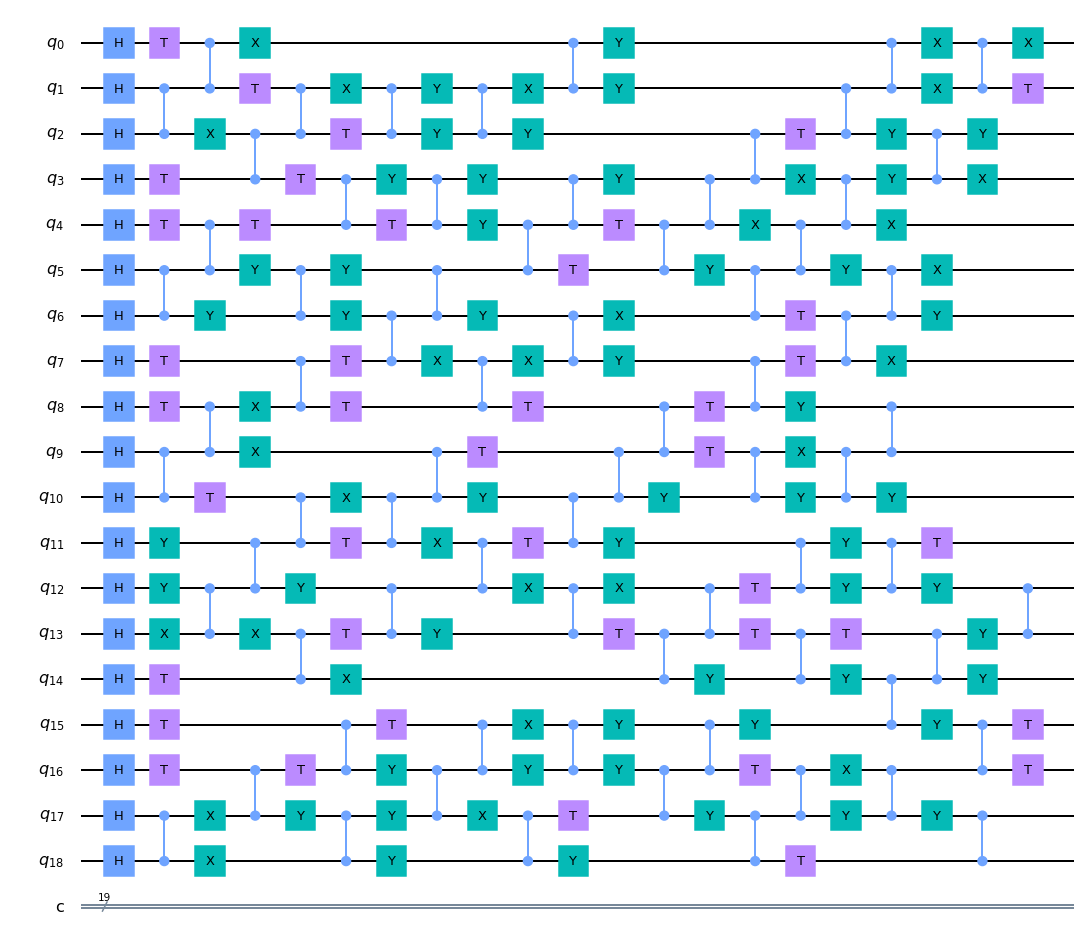

In [55]:
# to visualize last random circuit:
circR1.draw(output='mpl')



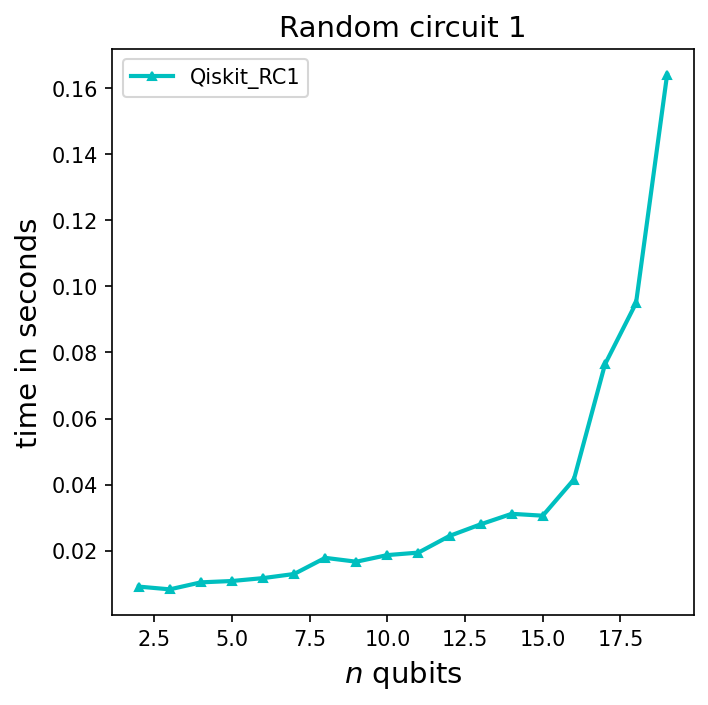

In [56]:
y1 = range(2, width)

# TIME
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
ax.plot(y1, qisRC1t, 'c', label='Qiskit_RC1', linewidth=2, marker='^', markersize=4)
#ax.plot(y1, qulT, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
#plt.xticks(np.arange(2, qisQubitsCNOT, step=4))
plt.title('Random circuit 1', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('time in seconds', fontsize=14)
ax.legend()

plt.show()

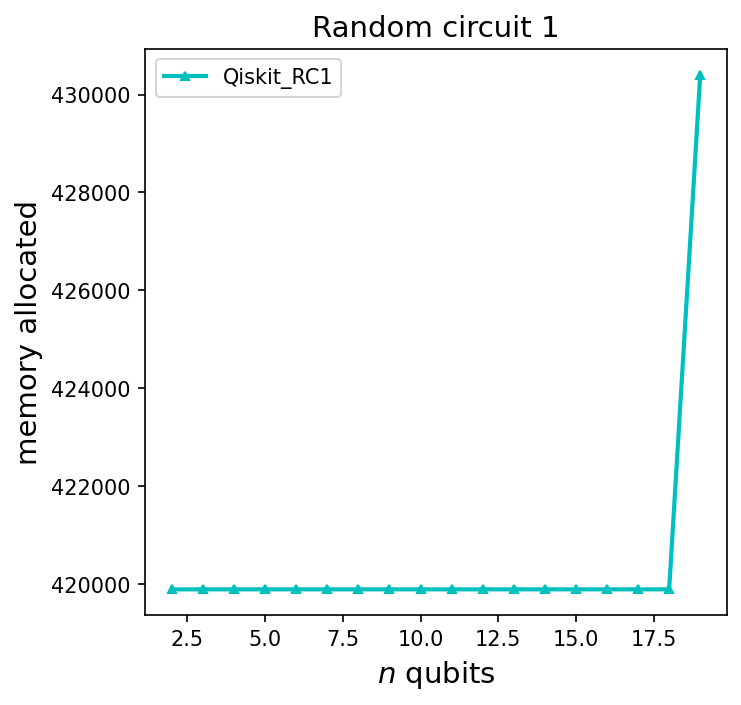

In [68]:
# memory
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
ax.plot(y1, qisRC1m, 'c', label='Qiskit_RC1', linewidth=2, marker='^', markersize=4)
#ax.plot(y1, qulT, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
#plt.xticks(np.arange(2, qisQubitsCNOT, step=4))
plt.title('Random circuit 1', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('memory allocated', fontsize=14)
ax.legend()

plt.show()

For the memory we are measuring the maximum resident set size (portion of memory occupied by a process that is held in main memory (RAM)) it takes to run.

**TODO implement this in qulacs, maybe improve where and how the time of the circuit is measured**

### 3.2 Implementation 2  <a id='RC2'></a>
Below a random circuit wiht no restrictions at all, using the same gate set as before:

In [69]:
# Random Circuit 2 qiskit statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
import random

qisRC2t = np.array([], dtype=float)
qisRC2m = np.array([], dtype=float)

qisQubitsRC2 = 20
times = 10

for k in range(2, qisQubitsRC2):
    tt_tot = 0.0
    rss_tot = 0.0     
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()

        # defining the device
        q = QuantumRegister(k, 'q')
        c = ClassicalRegister(k, 'c')
        circR1 = QuantumCircuit(q, c)

        for i in range(depth):
            amount = np.random.randint(0, 3)
            for j in range(amount):
                # chosing a random gate and applying it on a random circuit
                rGate = np.random.choice(arr)
                i0 = np.random.randint(0, k)
                i1 = np.random.randint(0, k)
                while i0 == i1: i1 = np.random.randint(0, k)

                if rGate == 'H':
                    circR1.h(q[i0])
                elif rGate == 'T':
                    circR1.t(q[i0])
                elif rGate == 'X':
                    circR1.x(q[i0])
                elif rGate == 'Y':
                    circR1.y(q[i0])
                elif rGate == 'C(Z)':
                    circR1.cz(q[i0], q[i1])

        circR1.measure(q, c)

        # the default backend to run the whole circuit
        backend = Aer.get_backend('qasm_simulator')
        job_sim = execute(circR1, backend)
        result = job_sim.result()
        
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
        rss_tot += max_rss 

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot
        
    rss_avg = rss_tot / times
    qisRC2m = np.append(qisRC2m, [t_avg])
        
    t_avg = tt_tot / times
    qisRC2t = np.append(qisRC2t, [t_avg])
    
print(qisRC2t)

[0.00749659 0.00647764 0.00675281 0.00702278 0.00736978 0.00773675
 0.00841709 0.00826458 0.00911244 0.01101735 0.01020192 0.01012417
 0.01020556 0.01403288 0.01326541 0.01430551 0.01541977 0.02689346]


The code for measuring the time it takes to run this random circuit implementation in Qulacs:

In [70]:
# Random Circuit 2 qulacs
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
import random

qulRC2t = np.array([], dtype=float)
qulRC2m = np.array([], dtype=float)

qulQubitsRC2 = 20
times = 10

for k in range(2, qulQubitsRC2):
    rss_tot = 0.0
    tt_tot = 0.0
    for t in range(times):
        tracemalloc.start()
        t_start = time.perf_counter()

        state = QuantumState(k)
        state.set_zero_state()

        circuit = QC(k)

        for i in range(depth):
            amount = np.random.randint(0, 3)
            for j in range(amount):
                rGate = np.random.choice(arr)
                i0 = np.random.randint(0, k)
                i1 = np.random.randint(0, k)
                while i0 == i1: i1 = np.random.randint(0, k)

                if rGate == 'H':
                    circuit.add_H_gate(i0)
                elif rGate == 'T':
                    circuit.add_T_gate(i0)
                elif rGate == 'X':
                    circuit.add_X_gate(i0)
                elif rGate == 'Y':
                    circuit.add_Y_gate(i0)
                elif rGate == 'C(Z)':
                    circuit.add_CZ_gate(i0, i1)

        circuit.update_quantum_state(state)
        output = state
        del circuit
        del state
                
        snapshot = tracemalloc.take_snapshot()
        top_stats = snapshot.statistics('lineno')
        tracemalloc.stop()
        max_rss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

        rss_tot += max_rss

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start

        tt_tot += t_tot
        
    rss_avg = rss_tot / times
    qulRC2m = np.append(qulRC2m, [rss_avg])

    t_avg = tt_tot / times
    qulRC2t = np.append(qulRC2t, [t_avg])

print(qulRC2t)

[0.00175583 0.00078303 0.00078477 0.00084244 0.00075981 0.0007315
 0.00077709 0.00074263 0.00074243 0.00073804 0.00093406 0.00101367
 0.00102404 0.00110779 0.0011503  0.00109641 0.00163437 0.00243125]


This is so you can play with the amount of qubits and still can plot the graph without problems. 

In [71]:
y2 = []
if qisQubitsRC2 < qulQubitsRC2: 
    for i in range(qulQubitsRC2 - qisQubitsRC2): 
        qisRC2t = np.append(qisRC2t, [np.nan])
    y2 = range(2, qulQubitsRC2)
    n = qulQubitaRC2
elif qisQubitsRC1 > qulQubitsRC2:
    for i in range(qisQubitsRC2 - qulQubitsRC2): 
        qulRC2t = np.append(qulRC2t, [np.nan])
    y2 = range(2, qisQubitsRC2)
    n = qisQubitsRC2
else:
    y2 = range(2, qisQubitsRC2)
    n = qulQubitsRC2
    
print (len(y2))
print (len(qulRC2t))

18
18


Below we will put these results in a graph in which you can see the time it takes to execute the random circuits on the increasing amount of qubits. 

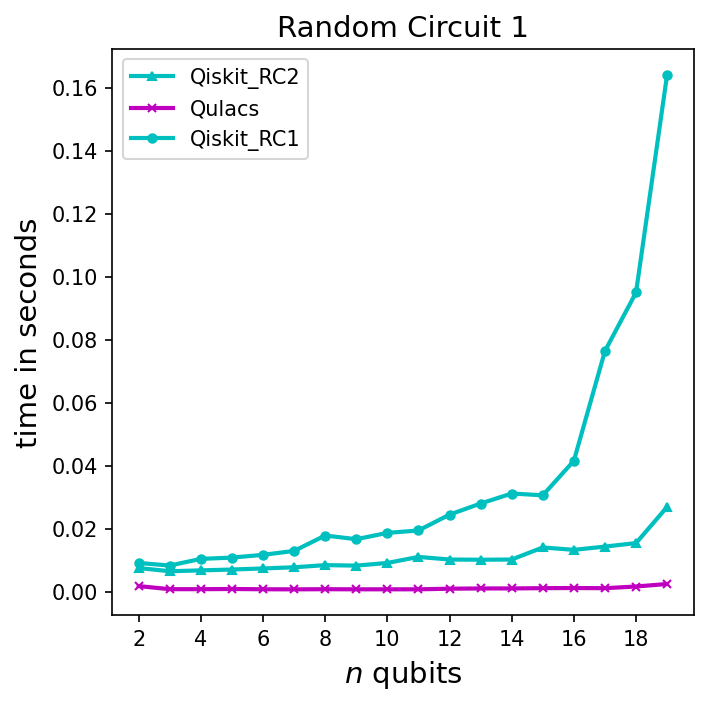

In [72]:
#TIME
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
# the whole graph
plt.plot(y2, qisRC2t, 'c', label='Qiskit_RC2', linewidth=2, marker='^', markersize=4)
plt.plot(y2, qulRC2t, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
ax.plot(y1, qisRC1t, 'c', label='Qiskit_RC1', linewidth=2, marker='o', markersize=4)
plt.xticks(np.arange(2, qisQubitsRC1, step=2))
plt.title('Random Circuit 1', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('time in seconds', fontsize=14)
plt.legend()
plt.xticks(np.arange(2, n, step=2))

# show the whole graph
plt.show()

Probably the extra time of RC1 is due to all the logic, figure out if we can improve this timing to point out the effect of a given ratio between single and control gates and also the T gate

In this graph Qulacs is the most efficient. In this case Qiskit can not simulate 67 qubits, this is because the T- and the CZ-gate are not Clifford gates, their simulation scales exponentially! From this result we can conclued that the Clifford gates are only gates that are optimized in Qiskit.

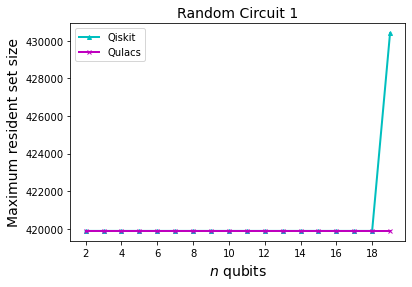

In [73]:
# MEMORY
#fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 

# the whole graph
plt.plot(y2, qisRC1m, 'c', label='Qiskit', linewidth=2, marker='^', markersize=4)
plt.plot(y2, qulRC1m, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
plt.xticks(np.arange(2, qisQubitsRC1, step=2))
plt.title('Random Circuit 1', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('Maximum resident set size', fontsize=14)
plt.legend()

plt.xticks(np.arange(2, n, step=2))

# show the whole graph
plt.show()

### 3.3 Implementation 3  <a id='RC3'></a>
Below a random circuit consisting of only Clifford gates

In [63]:
#QISKIT random circuit 3 only clifford gates
# Random Circuit 2 qulacs
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
import random

# the amount of qubits we will run
qisQubitsClif = 20
times = 10
qisClifT = np.array([], dtype=float)

# an array with every Clifford gate
clifford = ['H', 'S', 'X', 'Y', 'Z', 'CX']  

q = QuantumRegister(qisQubitsClif, 'q')
c = ClassicalRegister(qisQubitsClif, 'c')
circ = QuantumCircuit(q, c)

for a in range(2, qisQubitsClif):
    tt_tot = 0.0
    for t in range(times):
        t_start = time.perf_counter()
        q = QuantumRegister(a, 'q')
        c = ClassicalRegister(a, 'c')
        circ = QuantumCircuit(q, c)

        for i in range(depth):
            amount = np.random.randint(0, 3)

            for i in range(amount):
                # chosing a random Clifford gate
                rGate = np.random.choice(clifford)
                i0 = np.random.randint(0, a)
                i1 = np.random.randint(0, a)
                while i0 == i1: i1 = np.random.randint(0, a)

                if rGate == 'H':
                    circ.h(q[i0])
                elif rGate == 'S':
                    circ.s(q[i0])
                elif rGate == 'X':
                    circ.x(q[i0])
                elif rGate == 'Y':
                    circ.y(q[i0])
                elif rGate == 'Z':
                    circ.z(q[i0])
                elif rGate == 'CX':
                    circ.cx(q[i0], q[i1])

        circ.measure(q, c)

        backend = Aer.get_backend('qasm_simulator')
        job_sim = execute(circ, backend)
        sim_result = job_sim.result()

        t_stop = time.perf_counter()
        t_tot = t_stop - t_start
        tt_tot += t_tot

    t_avg = tt_tot / times
    qisClifT = np.append(qisClifT, [t_avg])

print(qisClifT)

[0.00621306 0.005517   0.00606272 0.00651258 0.00688576 0.00755196
 0.00806022 0.00840315 0.00806879 0.00827937 0.00863433 0.0090109
 0.00965976 0.01031723 0.01108762 0.01200782 0.01351004 0.01340466]


In [64]:
#Qulacs random circuit 3 only clifford gates
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qulacs import Observable, QuantumState, QuantumCircuit as QC
import time
import tracemalloc
import resource
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from qiskit.visualization import plot_histogram
import numpy as np
import random

# the amount of qubits we will run
qulQubitsClif = 20
times = 10
qulClifT = np.array([], dtype=float)

for a in range(2, qulQubitsClif):
    tt_tot = 0.0
    for t in range(times):
        t_start = time.perf_counter()

        state = QuantumState(a)
        state.set_zero_state()

        circuit = QC(a)

        for i in range(depth):
            amount = np.random.randint(0, 3)
            for j in range(amount):
                rGate = np.random.choice(clifford)
                i0 = np.random.randint(0, a)
                i1 = np.random.randint(0, a)
                while i0 == i1: i1 = np.random.randint(0, a)

                if rGate == 'H':
                    circuit.add_H_gate(i0)
                elif rGate == 'S':
                    circuit.add_S_gate(i0)
                elif rGate == 'X':
                    circuit.add_X_gate(i0)
                elif rGate == 'Y':
                    circuit.add_Y_gate(i0)
                elif rGate == 'Z':
                    circuit.add_Z_gate(i0)
                elif rGate == 'CX':
                    circuit.add_CNOT_gate(i0, i1)

        circuit.update_quantum_state(state)
        output = state
        del circuit
        del state

        t_stop = time.perf_counter()

        t_tot = t_stop - t_start
        tt_tot += t_tot

    t_avg = tt_tot / times
    qulClifT = np.append(qulClifT, [t_avg])

print(qulClifT)

[0.00041584 0.00036248 0.00036953 0.00041535 0.00038696 0.0003633
 0.00034384 0.00032304 0.00036891 0.00037277 0.00035919 0.00046737
 0.00053297 0.00079246 0.00103146 0.00180023 0.00422928 0.0042964 ]


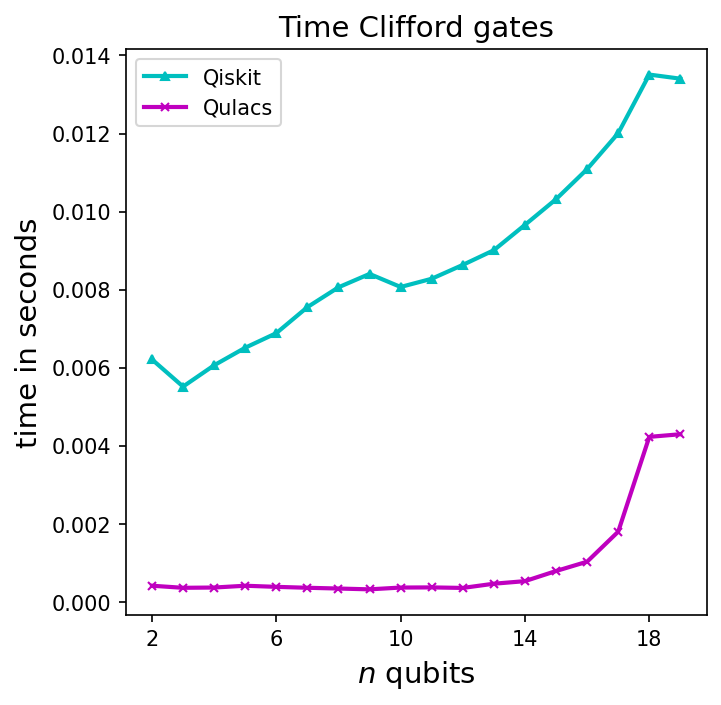

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150) 
y4 = []
if qisQubitsClif < qulQubitsClif: 
    for i in range(qulQubitsClif - qisQubitsClif): 
        qisClifT = np.append(qisClifT, [np.nan])
    y4 = range(2, qulQubitsClif)
elif qisQubitsClif > qulQubitsClif:
    for i in range(qisQubitsClif - qulQubitsClif): 
        qulClifT = np.append(qulClifT, [np.nan])
    y4 = range(2, qisQubitsClif)
else:
    y4 = range(2, qisQubitsClif)  
    
# the whole graph

ax.plot(y4, qisClifT, 'c', label='Qiskit', linewidth=2, marker='^', markersize=4)
ax.plot(y4, qulClifT, 'm', label='Qulacs', linewidth=2, marker='x', markersize=4)
plt.xticks(np.arange(2, qisQubitsRC1, step=2))
plt.xticks(np.arange(2, qisQubitsClif, step=4))
plt.title('Time Clifford gates', fontsize=14)

plt.xlabel('$n$ qubits', fontsize=14)
plt.ylabel('time in seconds', fontsize=14)
ax.legend()

# show the whole graph
plt.show()

## 3. Conclusion <a id='conclusion'></a>

To further develop quantum algorithms it is necessary to have quantum software. Already there are a lot of different quantum software and libraries, therefore it would be great to look at the performances of some libraries. In this notebook we saw that a lot of research papers use random circuits to benchmark quantum and with quantum software and libraries most compare the time and memory it takes to execute a circuit. The problem with quantum simulators is that there are a lot and they are all different, this means it is difficult to compare these software and libraries with each other in a benchmark. 

In this notebook we have looked at the two python libraries Qiskit and Qulacs. These libraries have been chosen, because they are different from each other and interesting for researchers. Qiskit is a full-stack library with a lot of documentation and beginners guides, Qulacs is said to run fast and can run on a GPU. 

From the benchmarks in this notebook the conclusion is that Qulacs for circuits with 20 or less qubits the fastest is, because it compresses circuits to simulate them faster. But Qiskit is best for using Clifford gates on more then 20 qubits. Qulacs uses more maximum resident set size then Qiskit. 

## References <a id='references'></a>

1. Aaronson, S., & Gottesman, D. (2004). Improved simulation of stabilizer circuits.Physical ReviewA,70(5), 1–15. https://doi.org/10.1103/physreva.70.052328

2. Abraham,  H.,  Akhalwaya,  I.  Y.,  Aleksandrowicz,  G.,  Alexander,  T.,  Alexandrowics,  G.,  Arbel,E.,  Asfaw,  A.,  Azaustre,  C.,  AzizNgoueya,  Barkoutsos,  P.,  Barron,  G.,  Bello,  L.,  Ben-Haim,  Y.,  Bevenius,  D.,  Bishop,  L.  S.,  Bosch,  S.,  Bravyi,  S.,  Bucher,  D.,  Cabrera,  F.,. . .  yotamvakninibm. (2019). Qiskit: An open-source framework for quantum computing.https://doi.org/10.5281/zenodo.2562110

3. Asfaw, A., Bello, L., Ben-Haim, Y., Bravyi, S., Capelluto, L., Vazquez, A. C., Ceroni, J., Chen, R.,Frisch, A., Gambetta, J., Garion, S., Gil, L., Gonzalez, S. D. L. P., Harkins, F., Imamichi,T., McKay, D., Mezzacapo, A., Minev, Z., Movassagh, R., . . .  Wootton, J. (2020). Learnquantum computation using qiskit. http://community.qiskit.org/textbook

4. Emerson, J. (2004). Pseudo-random unitary operators for quantum information processing.Sci-ence,302(5653). https://doi.org/10.1126/science.1090790

5. Fingerhuth,  M.,  Babej,  T.,  &  Wittek,  P.  (2018).  Open  source  software  in  quantum  computing.PLOS ONE,13(12), 1–28. https://doi.org/10.1371/journal.pone.0208561

6. Jones, T., Brown, A., Bush, I., & Benjamin, S. (2018). Quest and high performance simulation ofquantum computers. https://arxiv.org/pdf/1802.08032.pdf

7. Qulacs. (2018). https://github.com/qulacs/qulacs